In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **모듈 설치**

In [2]:
# ! pip uninstall JPype1
# ! pip install JPype1-py3

In [3]:
# konlpy 설치
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 48.5 MB/s 


In [4]:
# install mecab
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 5.25 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [5]:
! ls

drive  Mecab-ko-for-Google-Colab  sample_data


In [6]:
#move to Mecab-ko~ folder
! cd Mecab-ko-for-Google-Colab

In [7]:
! bash install_mecab-ko_on_colab190912.sh

bash: install_mecab-ko_on_colab190912.sh: No such file or directory


In [9]:
! sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.18).
git is already the newest version (1:2.17.1-1ubuntu0.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [10]:
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/restricted a

In [1]:
from konlpy.tag import Kkma, Komoran, Okt, Mecab

mec = Mecab()
okt = Okt()
kkm = Kkma()
kom = Komoran()

---

In [ ]:
# # Colab에서 오류 없이 Mecab 설치: https://sosomemo.tistory.com/31
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

### **데이터 준비**

In [3]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/qna_for_git.csv', index_col=0)
# df.head()

In [4]:
# 정수 인코딩
sub_type_mapping = {
    'type_1': 0,
    'type_2': 1,
    'type_3': 2,
    'type_4': 3,
    'type_5': 4,
    'type_6': 5,
    'type_7': 6,
    'type_8': 7,
    'type_9': 8,
    'type_10': 9,
    'type_11': 10,
    'type_12': 11,
    'type_13': 12,
    'type_14': 13,
    'type_15': 14,
    'type_16': 15,
    'type_17': 16,
    'type_18': 17,
    'type_19': 18,
    'type_20': 19,
    'type_21': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [5]:
df['sub_type'] = df['sub_type'].map(func)

In [6]:
# df.head()

### **오버샘플링**

In [7]:
# 특징과 label 분리
X = df.drop('sub_type', axis=1)
y = df['sub_type']

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# SMOTE 인스턴스 생성
# smote = SMOTE(k_neighbors=3)
method = RandomOverSampler()

# 오버샘플링 적용
# o_X_train, o_y_train = smote.fit_resample(X_train, y_train)
X, y = method.fit_resample(X, y)

X = pd.DataFrame(X, columns=X.columns)
y = pd.Series(y)

In [9]:
y.value_counts()

14    1058
1     1058
18    1058
20    1058
17    1058
19    1058
16    1058
13    1058
5     1058
9     1058
11    1058
4     1058
12    1058
10    1058
0     1058
15    1058
6     1058
7     1058
2     1058
3     1058
8     1058
Name: sub_type, dtype: int64

#### **train, test set 분리**

In [10]:
df = pd.concat([X, y], axis=1)

In [11]:
print('전체 길이: ', len(df))
print('80% 길이: ', len(df)*0.8)

전체 길이:  22218
80% 길이:  17774.4


In [12]:
from sklearn.model_selection import train_test_split

# train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2,
                                     stratify=df['sub_type'].values)

In [13]:
# drop=True 안 하면 index 열 안 사라짐
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# df_train

In [15]:
# df_test

In [16]:
# 이거 안 맞아서 애먹음 ^^..
df_train['sub_type'].nunique(), df_test['sub_type'].nunique()

(21, 21)

### **데이터 로더 구성**
- ~데이터 중복 제거~
- ~NaN 결측치 제거~
- 한국어 토크나이저로 토큰화
- 불용어(stopwords) 제거
- 사전 `word_to_index` 구성
- 텍스트 스트링을 사전 인덱스 스트링으로 변환

In [17]:
from konlpy.tag import Mecab # 한국어 형태소 토큰화를 위해 형태소 분석기 중 mecab 사용
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(df_train, df_test, num_words=2774):
    # df_train.drop_duplicates(subset=['inquiry'], inplace=True) # 중복 제거
    df_train = df_train.dropna(how='any') # 결측치 하나라도 있으면 제거
    # df_test.drop_duplicates(subset=['inquiry'], inplace=True)
    df_test = df_test.dropna(how='any')
    
    X_train = []
    for sentence in df_train['inquiry']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
    print(X_train)
        
    X_test = []
    for sentence in df_test['inquiry']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words) # 각 요소의 개수 다루고 싶을 때
    counter = counter.most_common(2774-4) # 빈도순으로 높은 9996개 리스트 안의 튜플로 반환
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter] # vocab 저장
    # print(vocab)
    word_to_index = {word: index for index, word in enumerate(vocab)}
    # print(word_to_index)

    def wordlist_to_indexlist(wordlist): # 텍스트 스트링을 사전 인덱스 스트링으로
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(df_train['sub_type'])), X_test, np.array(list(df_test['sub_type'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(df_train, df_test)

[['차량', '워', '셔', '액', '없', '다고', '하심'], ['고객', '차량', '운행', '전', '앞', '범퍼', '파손', '되', '어', '문의'], ['타이어', '공기압', '경고', '등', '점', '등', '문의'], ['네비', '게이', '션', '켜', '지', '지', '않', '음', '인입'], ['조수석', '뒷문', '안', '에서', '안', '열리', '고', '밖', '에서', '열', '었', '더니', '안', '닫힌', '다고', '함'], ['주행', '도중', '시속', '80', 'km', '이상', '주행', '하', '면', '소음', '발생', '조치', '받', '았', '으나', '이상', '없', '음', '조치', '받', '아서', '계속', '운행', '했', '음', ',', '하지만', '주행', '도중', '뭔가', '터지', '소리', '발생', '하', '여', '정차', '하', '여', '문의', '함'], ['전면', '유리창', '손상', '목격', '되', '서', '제보', '처음', '이용', '하', '였을', '때', '안', '보였', '다가', ',', '이용', '하', '면서', '밝', '곳', '와서', '보', '니', '이제야', '보여서', '제보', '드림'], ['주유', '카드', '없', '다는', '문구', '보고', '인입'], ['35311739', '이동주', '차', '요청', '민원인'], ['주행', '시', '주행', '안', '되', '고', '브레이크', '안', '든다고', '하', '심', '/', '따로', '경고', '등', '점등', '된', '부분', 'x'], ['시동', '걸리', '지', '않', '음', '인입'], ['주행', '시', '주행', '안', '되', '고', '브레이크', '안', '든다고', '하', '심', '/', '따로', '경고', '등', '점등', '된', '부분', 

In [18]:
# load_data(df_train, df_test)

In [19]:
X_train

[[5, 61, 62, 60, 21, 14, 48],
 [57, 5, 41, 234, 145, 602, 185, 9, 17, 11],
 [42, 72, 10, 6, 28, 6, 11],
 [358, 694, 163, 290, 24, 24, 25, 13, 4],
 [183, 1011, 7, 40, 7, 322, 16, 781, 40, 523, 65, 695, 7, 2063, 14, 15],
 [50,
  555,
  728,
  1054,
  556,
  146,
  50,
  8,
  85,
  46,
  44,
  139,
  74,
  122,
  101,
  146,
  21,
  13,
  139,
  74,
  258,
  134,
  41,
  51,
  13,
  30,
  1209,
  50,
  555,
  853,
  801,
  67,
  44,
  8,
  128,
  513,
  8,
  128,
  11,
  15],
 [643,
  539,
  574,
  750,
  9,
  75,
  337,
  229,
  59,
  8,
  751,
  80,
  7,
  752,
  398,
  30,
  59,
  8,
  324,
  683,
  223,
  546,
  247,
  282,
  753,
  388,
  337,
  238],
 [63, 20, 21, 231, 255, 1210, 4],
 [368, 112, 69, 12, 225],
 [50,
  38,
  50,
  7,
  9,
  16,
  35,
  7,
  1282,
  8,
  159,
  39,
  517,
  10,
  6,
  86,
  164,
  138,
  986],
 [32, 181, 24, 25, 13, 4],
 [50,
  38,
  50,
  7,
  9,
  16,
  35,
  7,
  1282,
  8,
  159,
  39,
  517,
  10,
  6,
  86,
  164,
  138,
  986],
 [10, 6, 117, 463

In [20]:
len(df_train)

17774

In [21]:
len(X_train), len(X_test)

(17774, 4444)

In [22]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [23]:
type(X_train), type(y_train)

(list, numpy.ndarray)

In [24]:
index_to_word = {index: word for word, index in word_to_index.items()}

In [25]:
len(index_to_word)

2774

In [26]:
def to_one_hot(labels, dimension=21):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(y_train)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(y_test)

In [27]:
one_hot_train_labels.shape, one_hot_test_labels.shape

((17774, 21), (4444, 21))

In [28]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [29]:
one_hot_train_labels.shape, one_hot_test_labels.shape

((17774, 21), (4444, 21))

In [30]:
# 변수명 change
y_train = one_hot_train_labels
y_test = one_hot_test_labels

In [31]:
y_train.shape, y_test.shape

((17774, 21), (4444, 21))

In [32]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해주는 함수
# 단, 모든 문장은 <BOS>로 시작하는 것으로 하자.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word]
        if word in word_to_index else word_to_index['<UNK>'] 
            for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해주는 함수
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] 
        if index in index_to_word else '<UNK>' 
            for index in encoded_sentence[1:]) # [1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

### **모델 구성을 위한 데이터 분석 및 가공**
- 데이터셋 내 문장 길이 분포
- 적절한 최대 문장 길이 지정
- `keras.preprocessing.sequence.pad_sequences`을 활용한 패딩 추가

In [33]:
total_data_text = list(X_train) + list(X_test)
# 텍스트 데이터 문장길이의 리스트 생성

num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차 계산해보자
print('문장길이 평균: ', np.mean(num_tokens))
print('문장길이 최대: ', np.max(num_tokens))
print('문장길이 표준편차: ', np.std(num_tokens))

max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens)
maxlen = int(max_tokens)

print('padd_sequences maxlen: ', maxlen)
print('\n전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다.'.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균:  9.958592132505176
문장길이 최대:  169
문장길이 표준편차:  8.389163697718603
padd_sequences maxlen:  26

전체 문장의 0.9550814654784409%가 maxlen 설정값 이내에 포함됩니다.


In [34]:
# 위에서 설정한 maxlen 이용하기
import tensorflow as tf

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
print(X_train.shape)

(17774, 26)


### **Validation set 구성**

In [35]:
# validation set 600건 분리
X_val = X_train[:600]
y_val = one_hot_train_labels[:600]

# validation set을 제외한 나머지
partial_X_train = X_train[600:]
partial_y_train = one_hot_train_labels[600:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(17174, 26)
(17174, 21)


In [36]:
vocab_size = 2774 # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 32 # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터) // (높을수록 상세하게 분류) 우린 단어가 많지 않으므로

# model 설계
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(32)) # 가장 널리 쓰이는 LSTM레이어 (이 때 LSTM state 벡터의 차원수는 8로 함 - 변경 가능)
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(21, activation='softmax')) # 최종 출력은 긍정/부정을 나타내는 1차원

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          88768     
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 21)                693       
                                                                 
Total params: 98,837
Trainable params: 98,837
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# partial_y_train, y_val 얘네를 (~, 21)로 맞춰야 해 !!!!!!!!!!!!
# -> 애초에 y_train이 (~, )였음 -> 얘를 (~, 21)로 해야 함 ㅜㅜ

print(partial_X_train.shape, partial_y_train.shape, X_val.shape, y_val.shape)

(17174, 26) (17174, 21) (600, 26) (600, 21)


In [39]:
epochs = 30 # 몇 epoch를 훈련하면 좋을지 결과 보며 바꾸기

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/30
269/269 [==============================] - 14s 28ms/step - loss: 2.2482 - accuracy: 0.3498 - val_loss: 1.5113 - val_accuracy: 0.6050
Epoch 2/30
269/269 [==============================] - 6s 22ms/step - loss: 1.0073 - accuracy: 0.7628 - val_loss: 1.1254 - val_accuracy: 0.7167
Epoch 3/30
269/269 [==============================] - 5s 19ms/step - loss: 0.6303 - accuracy: 0.8494 - val_loss: 0.7248 - val_accuracy: 0.8433
Epoch 4/30
269/269 [==============================] - 5s 18ms/step - loss: 0.4903 - accuracy: 0.8788 - val_loss: 0.6887 - val_accuracy: 0.8367
Epoch 5/30
269/269 [==============================] - 5s 18ms/step - loss: 0.4215 - accuracy: 0.8939 - val_loss: 0.6254 - val_accuracy: 0.8517
Epoch 6/30
269/269 [==============================] - 5s 18ms/step - loss: 0.3709 - accuracy: 0.9046 - val_loss: 0.5976 - val_accuracy: 0.8650
Epoch 7/30
269/269 [==============================] - 7s 26ms/step - loss: 0.3315 - accuracy: 0.9153 - val_loss: 0.5973 - val_accuracy: 0.861

In [40]:
# 학습이 끝난 모델 테스트셋으로 평가해보기
results = model.evaluate(X_test, y_test, verbose=2)
print(results)

139/139 - 1s - loss: 0.3006 - accuracy: 0.9248 - 587ms/epoch - 4ms/step
[0.30062803626060486, 0.9248424768447876]


### **RNN - Loss, Accuracy 그래프 시각화**

In [41]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


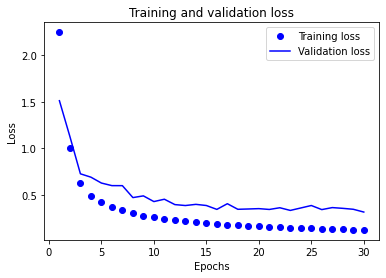

In [42]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

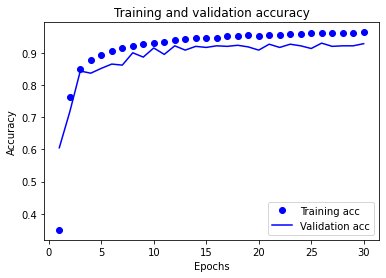

In [43]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

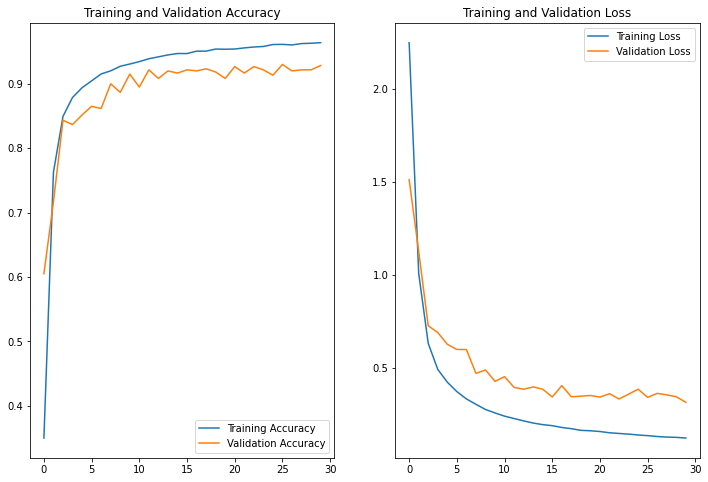

In [44]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

### **1-D CNN 모델**

### **한국어 Word2Vec 임베딩 활용하여 성능 개선**

In [45]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(2774, 32)


In [46]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장하기
word2vec_file_path = '/content/drive/MyDrive/AIFFELTHON/정연/word2vec_yeon_for_git.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개 제외)만큼의 워드 벡터를 파일에 기록
vectors = model.get_weights()[0]
for i in range(4, vocab_size):
  f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :]))))) # 왜 에러 뜨냐고오오오옥

f.close()

In [47]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['내비게이션'] # 한글로 확인
vector

array([-0.09378572, -0.1992448 , -0.10992545, -0.14748572,  0.01696207,
        0.38263097, -0.24466287, -0.1162529 , -0.18897526,  0.6444634 ,
       -0.12881783,  0.08181428,  0.29773036, -0.13707668, -0.13338892,
       -0.12177707,  0.38134202,  0.44020623, -0.05687466, -0.04662677,
       -0.4882481 ,  0.2588203 , -0.38971016,  0.5299952 , -0.5414159 ,
        0.17053914, -0.42297766, -0.29757577, -0.39414194, -0.68636674,
        0.06619383, -0.19760698], dtype=float32)

In [48]:
word_vectors.similar_by_word("내비게이션")

[('내비', 0.9106800556182861),
 ('비게', 0.8995236158370972),
 ('TCS', 0.8984370231628418),
 ('네비', 0.8860291242599487),
 ('비', 0.8683649301528931),
 ('네', 0.8543006181716919),
 ('sd', 0.8372660279273987),
 ('화면', 0.8164246678352356),
 ('음성', 0.8060863018035889),
 ('황색', 0.8040581941604614)]

In [49]:
word_vectors.similar_by_word("타이어")

[('공기압', 0.8574378490447998),
 ('접촉', 0.8351322412490845),
 ('퍼짐', 0.8276854753494263),
 ('=', 0.8261739015579224),
 ('TPMS', 0.818206250667572),
 ('펑', 0.8122922778129578),
 ('박혀서', 0.8023712635040283),
 ('바쁨', 0.8023172616958618),
 ('항아리', 0.7968149185180664),
 ('빠진다고', 0.7944369316101074)]

### **예측해보기**

In [50]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from konlpy.tag import Okt

okt = Okt()
mecab = Mecab()
tokenizer = Tokenizer()
# tokenizer = Tokenizer(num_words = 2774, oov_token="<OOV>")


In [51]:
sub_type_mapping = {
    0 : 'type_1',
    1 : 'type_2',
    2 : 'type_3',
    3 : 'type_4',
    4 : 'type_5',
    5 : 'type_6',
    6 : 'type_7',
    7 : 'type_8',
    8 : 'type_9',
    9 : 'type_10',
    10 : 'type_11',
    11 : 'type_12',
    12 : 'type_13',
    13 : 'type_14',
    14 : 'type_15',
    15 : 'type_16',
    16 : 'type_17',
    17 : 'type_18',
    18 : 'type_19',
    19 : 'type_20',
    20 : 'type_21'
}

In [52]:
def subtype_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

  tokenizer = Tokenizer(num_words=2774, oov_token="<OOV>")
  tokenizer.fit_on_texts(new_sentence)

  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded
                          , maxlen=maxlen) # 패딩


  # 참조: https://wiserloner.tistory.com/525
  # argsort: 넘파이 배열의 원소를 오름차순 정렬하는 메소드. 반환 값은 배열의 인덱스
  score = model.predict(pad_new)[0]
  # print(score)
  sort_index = (-score).argsort() # 내림차순 정렬

  for i in sort_index:
    print(sub_type_mapping.get(i))
    # label = [key for key, value in sub_type_mapping.items() if value == i][0]
    # print(label)

  # score = float(model.predict(pad_new)) # 예측

  # if(score > 0.5):
  #   print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  # else:
  #   print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [53]:
subtype_predict('내비게이션이 안 됩니다')

type_6
type_3
type_4
type_12
type_7
type_2
type_1
type_5
type_8
type_13
type_10
type_17
type_15
type_21
type_16
type_11
type_14
type_18
type_9
type_20
type_19


In [54]:
subtype_predict('타이어')

type_10
type_4
type_1
type_6
type_7
type_3
type_2
type_5
type_8
type_16
type_12
type_15
type_17
type_11
type_13
type_18
type_9
type_21
type_14
type_19
type_20


In [55]:
subtype_predict('내비게이션이 t맵 실행준비중으로만 나오고 작동 되지 않음')

type_2
type_5
type_3
type_6
type_8
type_4
type_14
type_15
type_7
type_19
type_1
type_16
type_12
type_10
type_21
type_11
type_9
type_17
type_18
type_13
type_20


In [56]:
subtype_predict('시동불가')

type_4
type_6
type_7
type_3
type_12
type_1
type_2
type_5
type_10
type_8
type_16
type_17
type_13
type_15
type_11
type_21
type_9
type_18
type_14
type_19
type_20


In [57]:
subtype_predict('내비게이션 와이파이가 잘 안 됩니다.')

type_3
type_5
type_2
type_6
type_4
type_7
type_8
type_1
type_12
type_15
type_10
type_16
type_21
type_14
type_11
type_18
type_9
type_19
type_13
type_17
type_20


In [58]:
subtype_predict('하이패스 고장')

type_4
type_6
type_7
type_3
type_12
type_1
type_2
type_5
type_10
type_8
type_16
type_17
type_13
type_15
type_11
type_21
type_9
type_18
type_14
type_19
type_20


In [59]:
subtype_predict('블루투스 연결불가 및 오디오 송출 불가로 인입')

type_2
type_3
type_5
type_4
type_6
type_8
type_7
type_1
type_15
type_14
type_12
type_16
type_19
type_10
type_9
type_17
type_11
type_18
type_21
type_13
type_20


### **사전학습된 Word2vec 워드 임베딩 모델 활용** 

In [60]:
import gensim
gensim.__version__

'3.6.0'

In [61]:
# !pip install --upgrade gensim==3.8.3

In [63]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec

import gensim
import numpy as np

# word2vec_path = os.getenv('HOME')+'/aiffel/ML/MLdev/movie_review_NLP/ko.bin'
# word2vec = gensim.models.Word2Vec.load(word2vec_path)

word2vec_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/ko.bin'

word2vec = gensim.models.Word2Vec.load(word2vec_path)
# word2vec = Word2Vec.load(word2vec_path)
# word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=None)
# word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
# word2vec = KeyedVectors.load(word2vec_path)

# word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
# vector = word2vec['컴퓨터']
# vector # 무려 200dim의 워드 벡터

In [64]:
word2vec.similar_by_word("행복")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('사랑', 0.6759077310562134),
 ('기쁨', 0.6493781805038452),
 ('즐거움', 0.6396492719650269),
 ('삶', 0.6299898028373718),
 ('젊음', 0.6187379360198975),
 ('즐겁', 0.6027448177337646),
 ('인생', 0.6002243161201477),
 ('존엄', 0.5952589511871338),
 ('고독', 0.5938762426376343),
 ('불행', 0.5894461870193481)]

In [65]:
vocab_size = 2774 # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 200 # 워드 벡터의 차원 수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [66]:
embedding_matrix.shape

(2774, 200)

In [67]:
from tensorflow.keras.initializers import Constant

vocab_size = 2774 # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 200 # 워드 벡터의 차원 수

# 모델 구성
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size,
                                    word_vector_dim,
                                    embeddings_initializer=Constant(embedding_matrix), # 카피한 임베딩을 여기서 활용
                                    input_length=maxlen,
                                    trainable=True)) # trainable을 True로 주면 Fine-tuing

model2.add(tf.keras.layers.Conv1D(168, 4, activation='relu')) # 필터로 지역적 특징 추출
model2.add(tf.keras.layers.MaxPooling1D(5))                   # 특정 구간마다 값 골라 벡터 구성한 후 반환
model2.add(tf.keras.layers.Conv1D(168, 4, activation='relu')) # 필터로 지역적 특징 추출
model2.add(tf.keras.layers.GlobalMaxPooling1D())              # 여러 벡터 중 가장 큰 벡터 골라 반환
model2.add(tf.keras.layers.Dense(84, activation='relu'))
model2.add(tf.keras.layers.Dense(21, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 200)           554800    
                                                                 
 conv1d (Conv1D)             (None, 23, 168)           134568    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 168)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 168)            113064    
                                                                 
 global_max_pooling1d (Globa  (None, 168)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 84)               

In [68]:
# 학습의 진행
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=30 # 훈련하며 바꿔보기

history = model2.fit(partial_X_train,
                     partial_y_train,
                     epochs=epochs,
                     batch_size=256,
                     validation_data=(X_val, y_val),
                     verbose=1)

Epoch 1/30
68/68 [==============================] - 15s 198ms/step - loss: 1.8207 - accuracy: 0.4843 - val_loss: 1.9502 - val_accuracy: 0.4550
Epoch 2/30
68/68 [==============================] - 13s 193ms/step - loss: 0.9467 - accuracy: 0.7290 - val_loss: 1.0692 - val_accuracy: 0.7033
Epoch 3/30
68/68 [==============================] - 13s 192ms/step - loss: 0.6722 - accuracy: 0.8014 - val_loss: 0.9790 - val_accuracy: 0.7317
Epoch 4/30
68/68 [==============================] - 13s 193ms/step - loss: 0.5688 - accuracy: 0.8328 - val_loss: 0.7275 - val_accuracy: 0.7700
Epoch 5/30
68/68 [==============================] - 15s 219ms/step - loss: 0.4959 - accuracy: 0.8477 - val_loss: 0.8025 - val_accuracy: 0.7767
Epoch 6/30
68/68 [==============================] - 13s 194ms/step - loss: 0.4689 - accuracy: 0.8533 - val_loss: 0.7580 - val_accuracy: 0.8050
Epoch 7/30
68/68 [==============================] - 13s 191ms/step - loss: 0.4442 - accuracy: 0.8597 - val_loss: 0.6742 - val_accuracy: 0.7950

In [69]:
# 테스트셋을 통한 모델 평가
results = model2.evaluate(X_test, y_test, verbose=2)

print(results)

139/139 - 1s - loss: 0.6537 - accuracy: 0.8441 - 920ms/epoch - 7ms/step
[0.6537135243415833, 0.844059407711029]


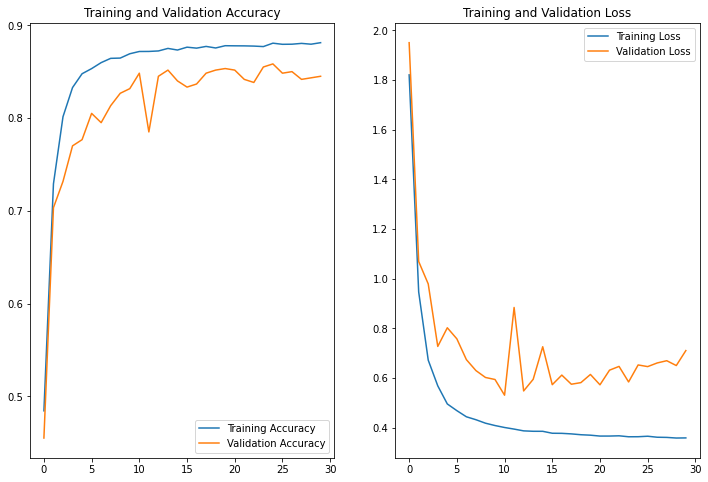

In [70]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
def subtype_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

  tokenizer = Tokenizer(num_words=2774, oov_token="<OOV>")
  tokenizer.fit_on_texts(new_sentence)

  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen=maxlen) # 패딩


  # 참조: https://wiserloner.tistory.com/525
  # argsort: 넘파이 배열의 원소를 오름차순 정렬하는 메소드. 반환 값은 배열의 인덱스
  score = model2.predict(pad_new)[0]
  # print(score)
  sort_index = (-score).argsort() # 내림차순 정렬

  for i in sort_index:
    print(sub_type_mapping.get(i))
    # label = [key for key, value in sub_type_mapping.items() if value == i][0]
    # print(label)

  # score = float(model2.predict(pad_new)) # 예측

  # if(score > 0.5):
  #   print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  # else:
  #   print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [72]:
subtype_predict('내비게이션이 안 됩니다')

type_21
type_10
type_4
type_16
type_1
type_13
type_9
type_8
type_15
type_14
type_7
type_6
type_18
type_12
type_5
type_17
type_2
type_3
type_11
type_19
type_20


In [73]:
subtype_predict('타이어')

type_21
type_10
type_4
type_16
type_1
type_13
type_9
type_8
type_15
type_14
type_7
type_6
type_18
type_12
type_5
type_17
type_2
type_3
type_11
type_19
type_20


In [74]:
subtype_predict('내비게이션이 t맵 실행준비중으로만 나오고 작동 되지 않음')

type_6
type_3
type_5
type_2
type_7
type_1
type_16
type_12
type_4
type_8
type_11
type_13
type_17
type_10
type_18
type_15
type_9
type_21
type_14
type_19
type_20


In [75]:
subtype_predict('내비게이션 와이파이가 잘 안 됩니다.')

type_7
type_1
type_2
type_6
type_8
type_12
type_10
type_3
type_4
type_17
type_5
type_15
type_18
type_11
type_16
type_13
type_14
type_9
type_21
type_20
type_19


In [76]:
subtype_predict('하이패스 고장')

type_21
type_10
type_4
type_16
type_1
type_13
type_9
type_8
type_15
type_14
type_7
type_6
type_18
type_12
type_5
type_17
type_2
type_3
type_11
type_19
type_20


In [77]:
subtype_predict('시동불가')

type_21
type_10
type_4
type_16
type_1
type_13
type_9
type_8
type_15
type_14
type_7
type_6
type_18
type_12
type_5
type_17
type_2
type_3
type_11
type_19
type_20
